In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from fastai.vision.all import *


In [3]:
data = ImageDataLoaders.from_folder('/content/drive/MyDrive/22222/major/currency-20230415T051842Z-001/currency/currency dataset',
                                    train='Train',
                                    valid='Test',
                                    bs=16,
                                    seed=42,
                                    item_tfms=Resize(360,method=ResizeMethod.Squish))

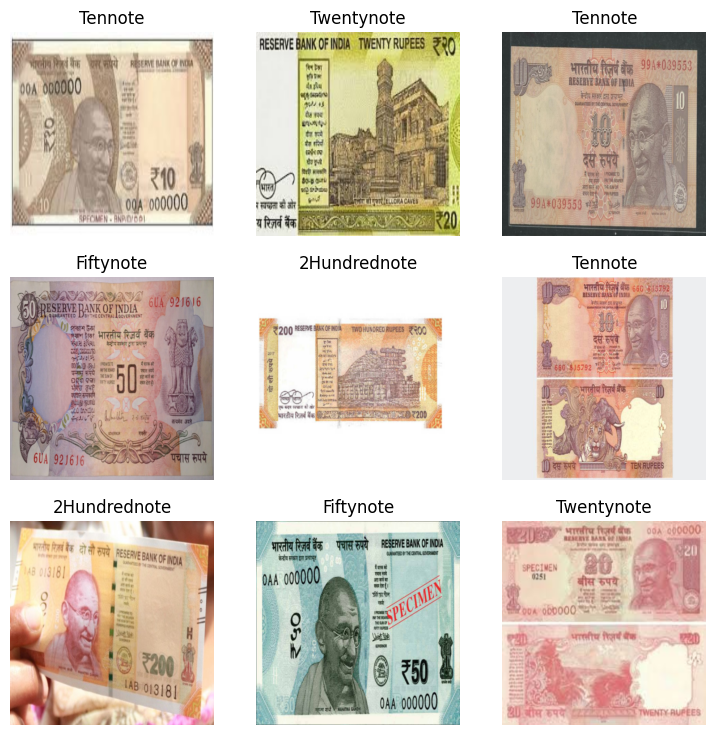

In [4]:
data.show_batch()

In [5]:
learn = cnn_learner(data, resnet34,
                    metrics=[error_rate,accuracy],
                    cbs=[SaveModelCallback()],
                    path='./')

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 170MB/s]


In [6]:
learn.fine_tune(5, 0.001, freeze_epochs=5,cbs=[SaveModelCallback()])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.947393,2.697771,0.904762,0.095238,00:38
1,2.725902,1.747518,0.619048,0.380952,00:03
2,2.424406,0.965503,0.380952,0.619048,00:06
3,1.960280,0.493549,0.166667,0.833333,00:03
4,1.547257,0.338989,0.095238,0.904762,00:03


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Better model found at epoch 0 with valid_loss value: 2.6977713108062744.
Better model found at epoch 0 with valid_loss value: 2.6977713108062744.
Better model found at epoch 1 with valid_loss value: 1.7475180625915527.
Better model found at epoch 1 with valid_loss value: 1.7475180625915527.
Better model found at epoch 2 with valid_loss value: 0.9655025005340576.
Better model found at epoch 2 with valid_loss value: 0.9655025005340576.
Better model found at epoch 3 with valid_loss value: 0.49354854226112366.
Better model found at epoch 3 with valid_loss value: 0.49354854226112366.
Better model found at epoch 4 with valid_loss value: 0.3389893174171448.
Better model found at epoch 4 with valid_loss value: 0.3389893174171448.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.301930,0.294492,0.071429,0.928571,00:04
1,0.237437,0.226106,0.071429,0.928571,00:04
2,0.194214,0.154266,0.000000,1.000000,00:04
3,0.161164,0.140109,0.000000,1.000000,00:04
4,0.136207,0.138682,0.000000,1.000000,00:03


Better model found at epoch 0 with valid_loss value: 0.2944919168949127.
Better model found at epoch 0 with valid_loss value: 0.2944919168949127.
Better model found at epoch 1 with valid_loss value: 0.22610612213611603.
Better model found at epoch 1 with valid_loss value: 0.22610612213611603.
Better model found at epoch 2 with valid_loss value: 0.15426576137542725.
Better model found at epoch 2 with valid_loss value: 0.15426576137542725.
Better model found at epoch 3 with valid_loss value: 0.1401088982820511.
Better model found at epoch 3 with valid_loss value: 0.1401088982820511.
Better model found at epoch 4 with valid_loss value: 0.13868248462677002.
Better model found at epoch 4 with valid_loss value: 0.13868248462677002.


SuggestedLRs(valley=9.120108734350652e-05)

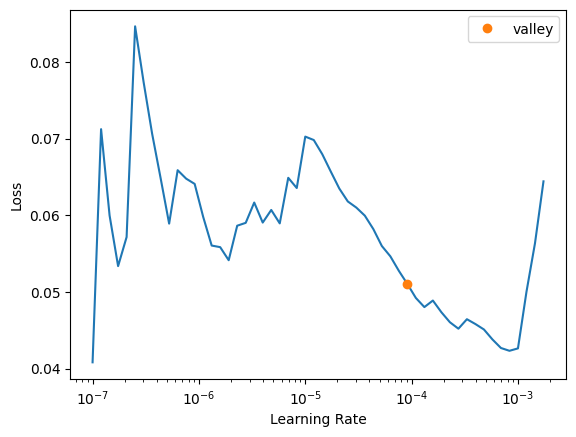

In [7]:
learn.lr_find()

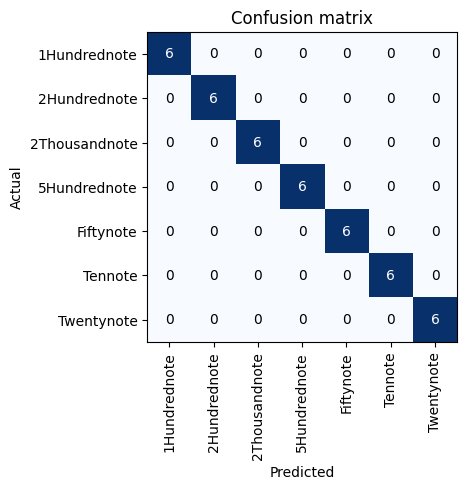

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [9]:
interp.plot_top_losses(9, figsize=(15,20))

Output hidden; open in https://colab.research.google.com to view.